# **Regression & Its Evaluation | Assignment**

Question 1: What is Simple Linear Regression?

Answer:

Simple Linear Regression is a statistical method used in Machine Learning to model the relationship between two variables: one independent variable (input) and one dependent variable (output). The goal is to find the best-fitting straight line (called a regression line) that predicts the output variable based on the input.

The equation of this line is:

𝑌
=
𝑏
0
+
𝑏
1
𝑋

Where:


Y is the predicted value (dependent variable),


X is the input feature (independent variable),


0
b
0
​
  is the intercept (value of Y when X = 0),


1
b
1
​
  is the slope of the line (how much Y changes with a unit change in X).

It is called "simple" because it uses only one independent variable. It's commonly used for tasks like predicting sales based on advertising spend or house price based on area.

 Question 2: What are the key assumptions of Simple Linear Regression?

 Answer:

Simple Linear Regression is a statistical method that relies on several core assumptions to ensure the accuracy and reliability of its predictions. If these assumptions are violated, the model's output may become biased or misleading.

| Assumption             | Description                                                    | Importance                       |
| ---------------------- | -------------------------------------------------------------- | -------------------------------- |
| Linearity              | X and Y must have a linear relationship                        | Ensures correct model form       |
| Independence of errors | Residuals must not influence each other                        | Prevents autocorrelation bias    |
| Homoscedasticity       | Residuals should have constant variance                        | Validates consistent prediction  |
| Normality of errors    | Residuals should follow a normal distribution                  | Enables valid hypothesis testing |
| No multicollinearity   | Predictors should not be highly correlated (Not required here) | Only for multiple regression     |


Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answer:

Heteroscedasticity refers to a situation in regression analysis where the variance of the residuals (errors) is not constant across all levels of the independent variable(s). In simple terms, it means that the spread of errors varies depending on the value of X.

Why is it important to address?

Invalid Statistical Tests:

Heteroscedasticity can lead to biased standard errors, which affects t-tests, F-tests, and confidence intervals.

This means your p-values may be incorrect, leading to false conclusions about significance.

Unreliable Predictions:

The model might fit the average trend but perform poorly on individual predictions—especially in areas where error variance is high.

Violated Assumptions:

It breaks one of the key assumptions of linear regression, which requires homoscedastic residuals.

Question 4: What is Multiple Linear Regression?

Answer:

Multiple Linear Regression (MLR) is an extension of simple linear regression where the dependent variable is predicted using two or more independent variables. It helps us understand how multiple factors together influence the outcome.

The general equation is:

𝑌
=
𝑏
0
+
𝑏
1
𝑋
1
+
𝑏
2
𝑋
2
+
…
+
𝑏
𝑛
𝑋
𝑛
+
𝜀

Where:

𝑌
Y: Dependent variable (what we want to predict)

𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X
1
​
 ,X
2
​
 ,...,X
n
​
 : Independent variables (predictors)

𝑏
0
b
0
​
 : Intercept (value of Y when all Xs are 0)

𝑏
1
,
𝑏
2
,
.
.
.
,
𝑏
𝑛
b
1
​
 ,b
2
​
 ,...,b
n
​
 : Coefficients for each independent variable

𝜀
ε: Error term (difference between actual and predicted values)



Question 5: What is Polynomial Regression, and how does it differ from Linear Regression?

Answer:

Polynomial Regression is a type of regression where the relationship between the independent variable X and the dependent variable Y is modeled as an nth-degree polynomial:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
.
.
.
+
𝛽
𝑛
𝑋
𝑛
+
𝜀

Differences from Linear Regression:

Linear Regression: Fits a straight line

Polynomial Regression: Fits a curved line

Polynomial regression can capture non-linear patterns in the data.

Question 6: Implement a Simple Linear Regression in Python

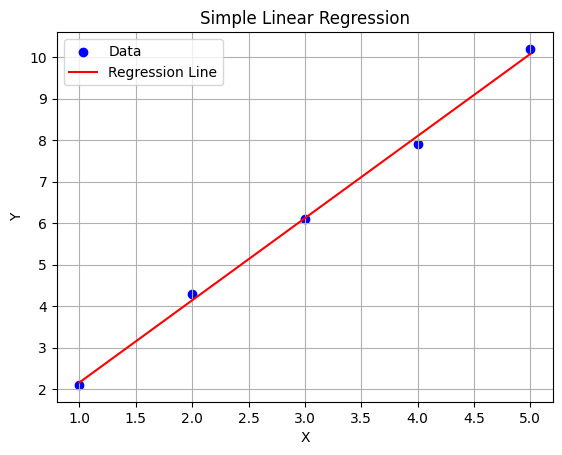

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Prediction
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid()
plt.show()


Question 7: Multiple Linear Regression with VIF Check

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
y = data['Price']

# Add constant
X_const = sm.add_constant(X)

# Model
model = sm.OLS(y, X_const).fit()
print(model.summary())

# VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 26 Jul 2025   Prob (F-statistic):             0.0377
Time:                        13:19:44   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


 Question 8: Polynomial Regression (2nd Degree)

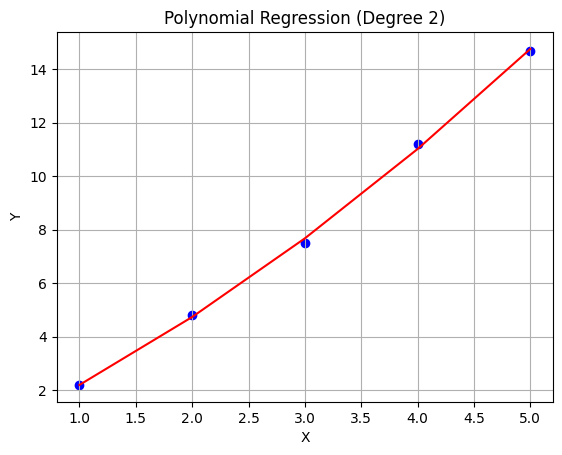

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()


Question 9: Residuals Plot and Heteroscedasticity

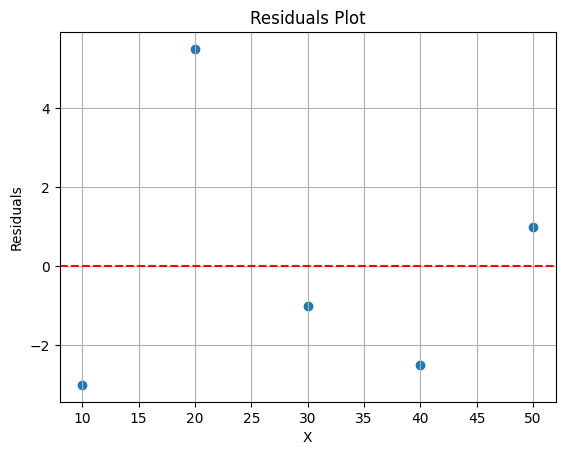

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.grid()
plt.show()


Question 10: Real Estate Model – Fixing Heteroscedasticity & Multicollinearity


Answer:

To fix heteroscedasticity:

    Log transformation of dependent or independent variables

    Use Weighted Least Squares regression

    Apply Robust Standard Errors

To fix multicollinearity:

    Calculate VIF and drop variables with high multicollinearity

    Use Principal Component Analysis (PCA)

    Combine correlated features into a single one

General steps:

    EDA to visualize relationships

    Correlation matrix to detect multicollinearity

    Residual plots to check heteroscedasticity

    Try ridge/lasso regression if issues persist